In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Load data
data = pd.read_csv('emotion_sentimen_dataset.csv')



In [ ]:
data['Emotion'].value_counts()

Emotion
neutral       674538
love           39553
happiness      27175
sadness        17481
relief         16729
hate           15267
anger          12336
fun            10075
enthusiasm      9304
surprise        6954
empty           5542
worry           4475
boredom          126
Name: count, dtype: int64

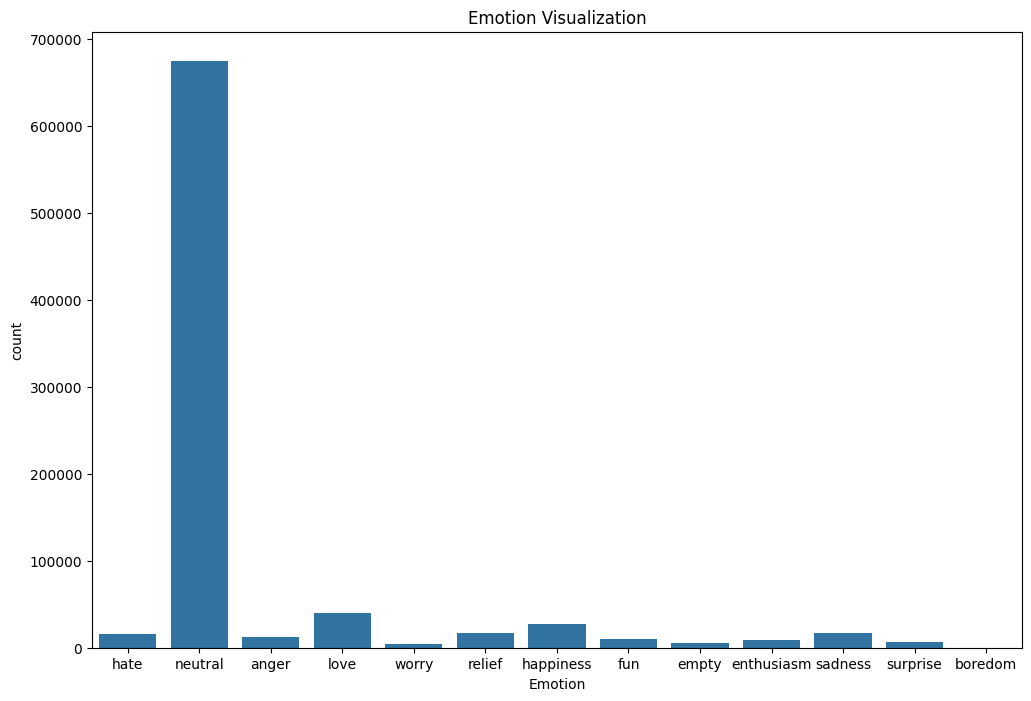

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion', data=data)
plt.title('Emotion Visualization')
plt.show()

In [ ]:
def clean_data(text):
    # Convert all letters to lowercase
    text = text.lower()

    # Remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', ' ', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])

    return text


# Clean the text data
data['text'] = data['text'].apply(clean_data)


In [ ]:
print(data)

        Unnamed: 0                                               text  Emotion
0                0  seriously hate one subject death feel reluctan...     hate
1                1                         im full life feel appalled  neutral
2                2  sit write start dig feelings think afraid acce...  neutral
3                3  ive really angry r feel like idiot trusting fi...    anger
4                4  feel suspicious one outside like rapture happe...  neutral
...            ...                                                ...      ...
839550      839550  feel like telling horny devils find site suite...  neutral
839551      839551  began realize feeling agitated restless would ...  neutral
839552      839552  feel curious previous early dawn time seek tro...  neutral
839553      839553  feel becuase tyranical nature government el sa...  neutral
839554      839554  think spent time investigating surroundings th...  neutral

[839555 rows x 3 columns]


In [ ]:
# Prepare text data
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
x = pad_sequences(sequences, maxlen=200)

# Prepare target data
encoder = LabelEncoder()
encoder.fit(data['Emotion'])
encoded_y = encoder.transform(data['Emotion'])
y = to_categorical(encoded_y)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)




Epoch 1/10
10495/10495 [==============================] - 1627s 155ms/step - loss: 0.0846 - accuracy: 0.9857 - val_loss: 0.0486 - val_accuracy: 0.9938
Epoch 2/10
10495/10495 [==============================] - 1603s 153ms/step - loss: 0.0363 - accuracy: 0.9943 - val_loss: 0.0368 - val_accuracy: 0.9944
Epoch 3/10
10495/10495 [==============================] - 1545s 147ms/step - loss: 0.0214 - accuracy: 0.9959 - val_loss: 0.0278 - val_accuracy: 0.9956
Epoch 4/10
10495/10495 [==============================] - 1684s 160ms/step - loss: 0.0128 - accuracy: 0.9972 - val_loss: 0.0255 - val_accuracy: 0.9964
Epoch 5/10
10495/10495 [==============================] - 1590s 152ms/step - loss: 0.0086 - accuracy: 0.9980 - val_loss: 0.0219 - val_accuracy: 0.9971
Epoch 6/10
10495/10495 [==============================] - 2155s 205ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.0252 - val_accuracy: 0.9969
Epoch 7/10
10495/10495 [==============================] - 1621s 154ms/step - loss: 0.0051 - ac

In [ ]:
# Define model
model = Sequential()
model.add(Embedding(5000, 100, input_length=200))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

In [ ]:


# Save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Save the tokenizer and the encoder
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('encoder.pkl', 'wb') as handle:
    pickle.dump(encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("The model, tokenizer, and encoder are successfully saved to the disk.")


The model, tokenizer, and encoder are successfully saved to the disk.


In [ ]:
# Load the model, tokenizer, and encoder from disk
with open('finalized_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

# Prepare your own data
texts = ["i am feeling great", "i feel jealous"]
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences, maxlen=200)

# Use the model to predict the emotion
predictions = model.predict(x)

# Convert predictions to labels
predicted_labels = encoder.inverse_transform(np.argmax(predictions, axis=1))

# Print the predicted labels
for text, label in zip(texts, predicted_labels):
    print(f'Text: {text} --> Predicted Emotion: {label}')


1/1 [==============================] - 0s 72ms/step
Text: i am feeling great --> Predicted Emotion: neutral
Text: i feel jealous --> Predicted Emotion: neutral
